In [48]:
# %pip install seaborn

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
FILESHARE_PATH = "/mnt/humpbackwhales/"

In [5]:
def load_denoising_traininglog(log_file):
    with open(log_file, "r") as f:
        logs = [line.strip().split("|") for line in f.readlines() if "loss:" in line]

    logs_pd = pd.DataFrame(logs)
    logs_pd.columns = ['ts', '_', 'set', 'epoch', 'loss', 'lr', 't']
    logs_pd['loss'] = logs_pd.loss.str.replace('loss:', '').astype('float')

    return logs_pd

#### Iteration 1

<Axes: xlabel='epoch', ylabel='loss'>

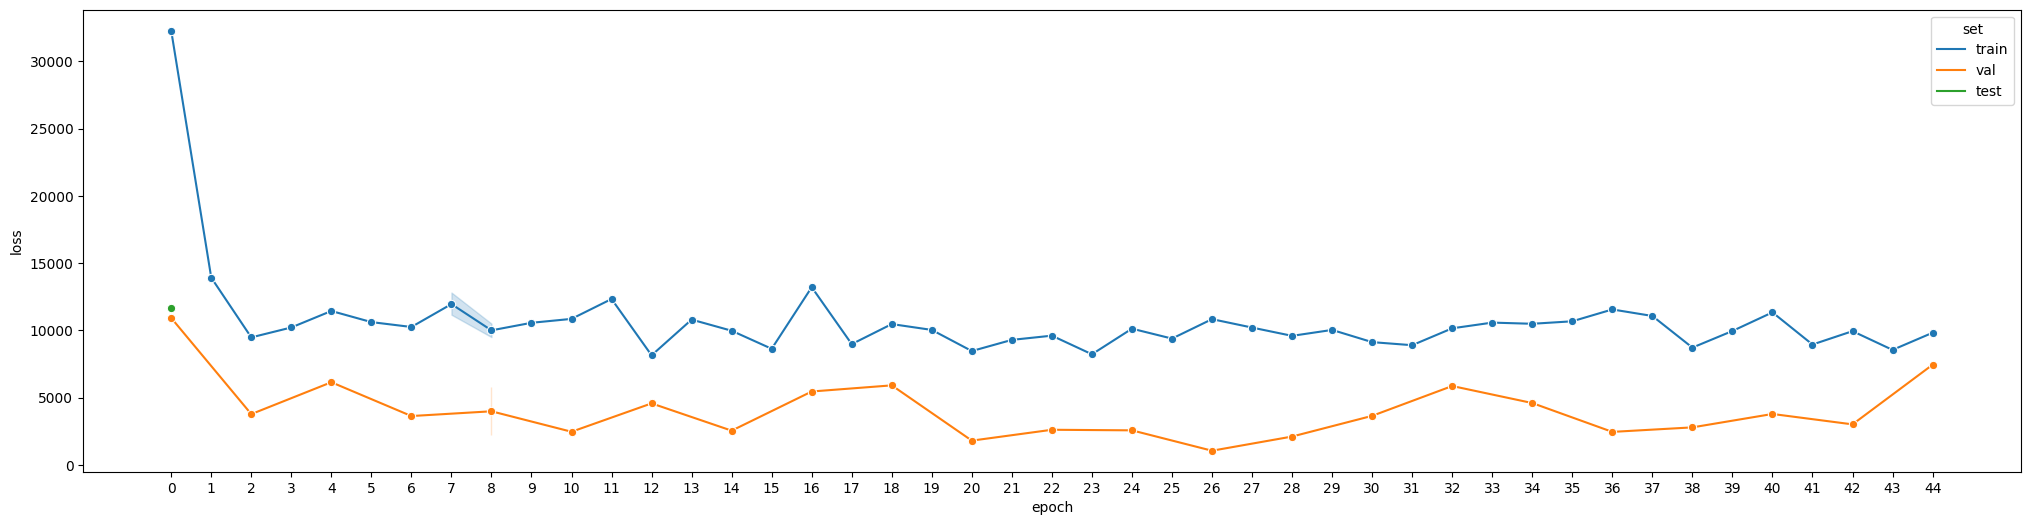

In [8]:
logs_iter1 = load_denoising_traininglog(f"{FILESHARE_PATH}/denoising-exec-artifacts-iter1/logs/TRAIN.log")

plt.figure(figsize=(25, 6))
sns.lineplot(data=logs_iter1, x='epoch', y='loss', hue='set', marker='o')

In [9]:
logs_iter1

,ts,_,set,epoch,loss,lr,t
0,10:22:46,I,train,0,32284.557,lr:1.60e-02,t:106.5
1,10:22:52,I,val,0,10918.331,t:6.8,None
2,10:24:43,I,train,1,13916.151,lr:1.60e-02,t:111.1
3,10:26:31,I,train,2,9472.160,lr:1.60e-02,t:107.2
4,10:26:38,I,val,2,3765.728,t:6.9,None
...,...,...,...,...,...,...,...
68,12:07:30,I,val,42,3002.813,t:7.3,None
69,12:09:26,I,train,43,8542.243,lr:8.00e-03,t:116.2
70,12:11:21,I,train,44,9818.253,lr:8.00e-03,t:115.1
71,12:11:29,I,val,44,7438.966,t:7.3,None


#### Iteration 2 (with more whales files)

(-500.0, 34000.0)

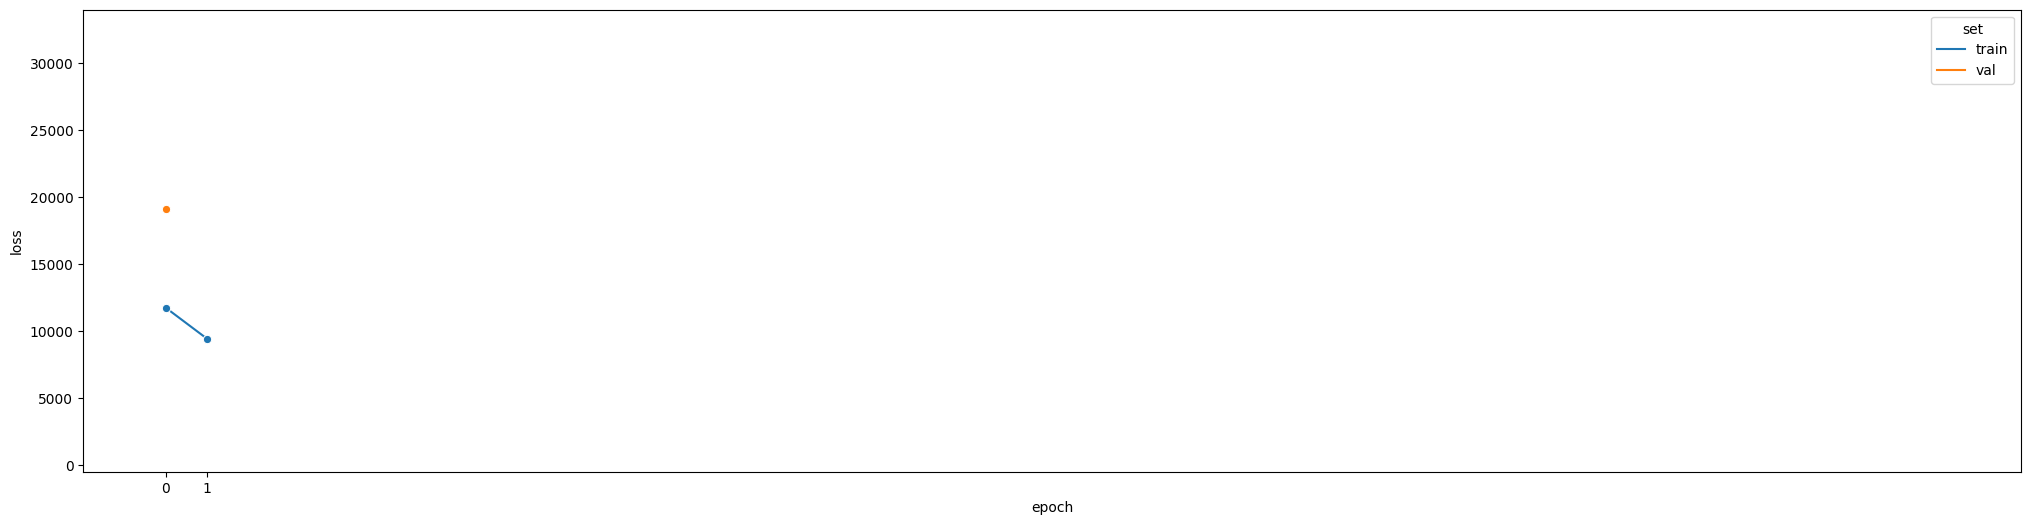

In [29]:
# Currently running in Maria's compute, will move to fileshare when finished
logs_iter2 = load_denoising_traininglog("../../../denoising-artifacts/logs/TRAIN.log")

plt.figure(figsize=(25, 6))
sns.lineplot(data=logs_iter2, x='epoch', y='loss', hue='set', marker='o')
plt.xlim(-2, 45)  # Adjusting to similar scale than iter1
plt.ylim(-500, 34_000)